In [1]:
! wget -nc -P data http://chasen.org/~daiti-m/gpbook/data/linear.dat

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\pf\GnuWin32/etc/wgetrc
�t�@�C�� `data/linear.dat' �͂��łɑ��݂���̂ŁA�擾���܂���B



[-2.  -0.9  0.4  2.   2.5  3. ]
[ 1.2 -0.3  1.7  2.5  1.1  3. ]
[1.21612367 0.3806516 ]


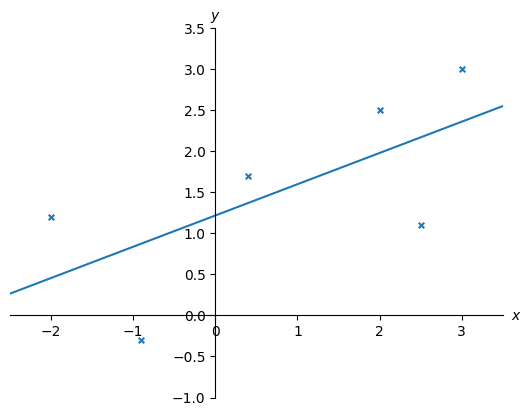

In [2]:
# Fig 1.5 linear.py
#%matplotlib inline

import library.putil as putil
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

DATA_FILE = "data/linear.dat"
SAVE_FILE = ""

M = 20
xmin = -2.5
xmax = 3.5
ymin = -1
ymax = 3.5

def simple_plot (x, y):
    global xmin, xmax
    N = len(x)

    print(x)
    print(y)

    # X in (1.27)
    X = np.vstack([np.ones(N),x]).T

    #(1.49)
    w = inv(X.T.dot(X)).dot(X.T).dot(y)

    xx = np.linspace(xmin, xmax, M)
    yy = w[0] + w[1] * xx

    # Plot data
    plt.scatter(x, y, marker="x", s = 16)
    # Plot regretted data
    plt.plot(xx, yy)

    print(w)

def equal_aspect ():
    ax = plt.axes()
    scale_str = ax.get_yaxis().get_scale()
    xmin,xmax = ax.get_xlim()
    ymin,ymax = ax.get_ylim()
    asp = abs((xmax-xmin)/(ymax-ymin))
    ax.set_aspect(asp)

def main ():
    data = np.loadtxt (DATA_FILE, dtype=float)

    simple_plot (data.T[0], data.T[1])

    putil.simpleaxis ()
    putil.zero_origin ()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    putil.add_xy ()
    plt.gca().axes.set_aspect (1)

    if len(SAVE_FILE) > 0:
        plt.savefig (SAVE_FILE)
    else:
        plt.show ()

if __name__ == "__main__":
    main ()


In [3]:
! wget -nc -P data http://chasen.org/~daiti-m/gpbook/data/multiple.dat

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\pf\GnuWin32/etc/wgetrc
�t�@�C�� `data/multiple.dat' �͂��łɑ��݂���̂ŁA�擾���܂���B



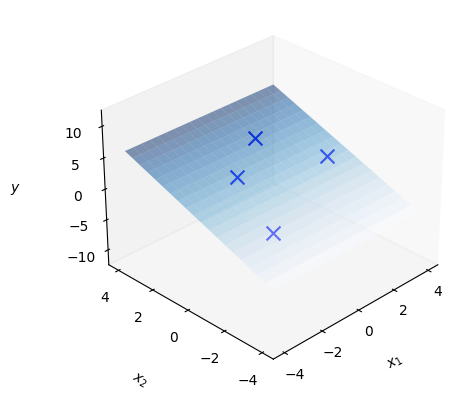

In [4]:
# Fig 1.7 multiple.py
#%matplotlib inline

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

DATA_FILE = "data/multiple.dat"
SAVE_FILE = ""

def multiple_regression (data):
    N = len(data)

    # prepare data
    X = np.zeros((N,3))
    # X in (1.26)
    X[:,0] = np.ones(N)
    X[:,1:] = data[:,0:2]

    y = data[:,2]
    
    # compute coefficients
    # (1.49)
    return inv(X.T.dot(X)).dot(X.T).dot(y)

def plot_multiple (data,w,N=20):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    [xmin,xmax,ymin,ymax] = [-4,4,-4,4]
    xx = np.linspace (xmin, xmax, N)
    yy = np.linspace (ymin, ymax, N)
    X,Y = np.meshgrid (xx,yy)
    Z = w[0] + w[1] * X + w[2] * Y

    # plot
    #putil.simple3d (ax)
    ax.set_zlim (-12,12)
    ax.tick_params(axis='x',pad=0)
    ax.set_xlabel (r'$x_1$',labelpad=8)
    ax.set_ylabel (r'$x_2$',labelpad=18)
    ax.set_zlabel (r'$y$',labelpad=16)
    # Plot regretted data
    ax.plot_surface (X,Y,Z,cmap='Blues',alpha=0.5)
    
    # plot points
    xs = data[:,0:2]
    ys = data[:,2]
    ax.scatter (data[:,0], data[:,1], data[:,2], s=100, c='blue', marker='x',
                depthshade=False)

    ax.view_init(elev=30, azim=225)
    ax.grid(visible = False)
    

def main ():
    data = np.loadtxt (DATA_FILE, dtype=float)
    w = multiple_regression (data)
    plot_multiple (data,w)
    if len(SAVE_FILE) > 0:
        plt.savefig (SAVE_FILE)
    plt.show ()


if __name__ == "__main__":
    main ()


In [5]:
! wget -nc -P data http://chasen.org/~daiti-m/gpbook/data/nonlinear.dat

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\pf\GnuWin32/etc/wgetrc
�t�@�C�� `data/nonlinear.dat' �͂��łɑ��݂���̂ŁA�擾���܂���B



[-0.0645769   0.0677136   0.02220641  0.33299749 -0.86249947]


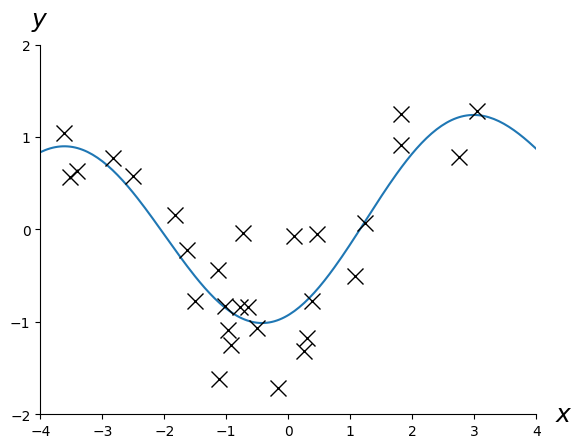

In [6]:
# Fig 1.10 lm.py

import sys
import library.putil as putil
import numpy as np
#from pylab import *
from numpy.linalg import inv
import matplotlib.pyplot as plt

DATA_FILE = "data/nonlinear.dat"
SAVE_FILE = ""

xlim = 4
ylim = 2
N = 200

def phi (x):
    return [1, x, x*x, np.sin(x), np.cos(x)]

def lm (xx,w):
    return [np.dot(w, phi(x)) for x in xx]

def add_xy (x=0.0,y=0.0):
    ax = plt.gca().axes
    if x == 0.0 or y == 0.0:
        x = ax.get_xlim()[1] + 0.1
        y = ax.get_ylim()[1] + 0.1
    ax.text(x+0.2,-ylim,r'$x$',va='center',size=18)
    ax.text(-xlim,y+0.1,r'$y$',ha='center',size=18)

def usage ():
    print('usage: lm.py data [output]')
    sys.exit (0)

def main ():
    data = np.loadtxt (DATA_FILE)

    # Phi in (1.60)
    X = np.array([phi(x) for x in data.T[0]])

    y = data.T[1]
    
    #(1.67)
    w = np.dot (np.dot (inv (np.dot(X.T,X)), X.T), y)
    print(w)

    xx = np.linspace (-xlim,xlim,N)
    yy = lm (xx, w)

    plt.plot (xx, yy)
    plt.plot (data.T[0], data.T[1], 'xk', markersize=12)
    plt.axis ([-xlim,xlim,-ylim,ylim])
    plt.yticks (range(-ylim,ylim+1))
    add_xy ()
    putil.simpleaxis ()

    if len(SAVE_FILE) > 0:
        putil.savefig (SAVE_FILE)
    plt.show ()

if __name__ == "__main__":
    main ()
